In [2]:
import pandas as pd
import numpy as np

In [3]:
MODEL_NAME = "resnet_gtsrb_new_models"

In [9]:
data = pd.read_csv(MODEL_NAME + ".csv")

In [5]:
data

,Unnamed: 0,layer_name,sample_id,num_of_injection,misclassifications,experiment
0,0.0,classes_block1_conv1,0,128,127,FaultInjection
1,1.0,classes_block1_conv1,1,128,125,FaultInjection
2,2.0,classes_block1_conv1,2,128,127,FaultInjection
3,3.0,classes_block1_conv1,3,128,125,FaultInjection
4,4.0,classes_block1_conv1,4,128,125,FaultInjection
...,...,...,...,...,...,...
477,155.0,classes_block5_conv4,5,128,118,Ranger_Ranger_Layer
478,156.0,classes_block5_conv4,6,128,112,Ranger_Ranger_Layer
479,157.0,classes_block5_conv4,7,128,123,Ranger_Ranger_Layer
480,158.0,classes_block5_conv4,8,128,123,Ranger_Ranger_Layer


In [60]:
#grouped_data = data.groupby(by=["layer_name","experiment"]).agg({'num_of_injection': np.sum, 'misclassifications': [np.sum, np.mean]}).reset_index()
grouped_data = data.groupby(by=["layer_name","experiment"]).agg({'num_of_injection': np.sum, 'misclassifications': [np.sum,]}).reset_index()

In [103]:
grouped_data_final = grouped_data.pivot(index ='layer_name', columns ='experiment')["misclassifications"]
grouped_data_final["num_of_injections"] = grouped_data["num_of_injection"].iloc[0].values[0]
#grouped_data_final.columns = grouped_data_final.columns.to_flat_index()
grouped_data_final

sum                                            \
experiment           FaultInjection Ranger_Clipping_Layer Ranger_Ranger_Layer   
layer_name                                                                      
classes_block1_conv1           1261                     0                   4   
classes_block1_conv2           1201                     0                  22   
classes_block2_conv1           1267                     0                  24   
classes_block2_conv2           1214                     0                  84   
classes_block3_conv1           1251                     0                  35   
classes_block3_conv2           1266                     0                   1   
classes_block3_conv3           1258                     0                  10   
classes_block3_conv4           1211                     0                  20   
classes_block4_conv1           1252                     0                  12   
classes_block4_conv2           1256                     0                   3   
classes_block4_conv3           1237                     0                   0   
classes_block4_conv4           1166                     0                  51   
classes_block5_conv1           1222                     3                 127   
classes_block5_conv2           1166                    20                 314   
classes_block5_conv3           1180                    60                1039   
classes_block5_conv4           1200                   849                1180   

                     num_of_injections  
experiment                              
layer_name                              
classes_block1_conv1              1280  
classes_block1_conv2              1280  
classes_block2_conv1              1280  
classes_block2_conv2              1280  
classes_block3_conv1              1280  
classes_block3_conv2              1280  
classes_block3_conv3              1280  
classes_block3_conv4              1280  
classes_block4_conv1              1280  
classes_block4_conv2              1280  
classes_block4_conv3              1280  
classes_block4_conv4              1280  
classes_block5_conv1              1280  
classes_block5_conv2              1280  
classes_block5_conv3              1280  
classes_block5_conv4              1280

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
grouped_data_final = grouped_data_final.drop(columns=["num_of_injections"])
grouped_data_final.columns = grouped_data_final.columns.droplevel(0)
grouped_data_final.reset_index()

experiment,layer_name,FaultInjection,Ranger_Clipping_Layer,Ranger_Ranger_Layer
0,classes_block1_conv1,1261,0,4
1,classes_block1_conv2,1201,0,22
2,classes_block2_conv1,1267,0,24
3,classes_block2_conv2,1214,0,84
4,classes_block3_conv1,1251,0,35
5,classes_block3_conv2,1266,0,1
6,classes_block3_conv3,1258,0,10
7,classes_block3_conv4,1211,0,20
8,classes_block4_conv1,1252,0,12
9,classes_block4_conv2,1256,0,3


<AxesSubplot:xlabel='layer_name'>

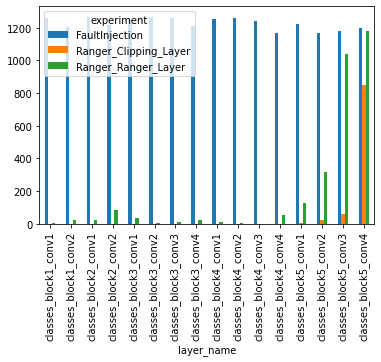

In [106]:
grouped_data_final.plot.bar()